<a href="https://colab.research.google.com/github/vishva2410/Titanic_prediction/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import standardScaler

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
df = pd.read_csv('titanic.csv')
df

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,91,1,2,113781,151.55,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,?,C
1305,3,0,"Zabour, Miss. Thamine",female,?,1,0,2665,14.4542,?,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,?,C
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.225,?,C


In [6]:
x, y = df.iloc[:, 0:-1].values, df.iloc[:, -1].values.reshape((-1, 1))

In [7]:
print(x,y)

[[1 1 'Allen, Miss. Elisabeth Walton' ... '24160' '211.3375' 'B5']
 [1 1 'Allison, Master. Hudson Trevor' ... '113781' '151.55' 'C22 C26']
 [1 0 'Allison, Miss. Helen Loraine' ... '113781' '151.55' 'C22 C26']
 ...
 [3 0 'Zakarian, Mr. Mapriededer' ... '2656' '7.225' '?']
 [3 0 'Zakarian, Mr. Ortin' ... '2670' '7.225' '?']
 [3 0 'Zimmerman, Mr. Leo' ... '315082' '7.875' '?']] [['S']
 ['S']
 ['S']
 ...
 ['C']
 ['C']
 ['S']]


In [30]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['age'].fillna(df['age'].median(), inplace=True)

<ipython-input-30-f088b6be7aa4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [20]:
x, y = df.drop(columns=['survived']).values, df['survived'].values.reshape((-1, 1))

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),  # First hidden layer (64 neurons)
    tf.keras.layers.Dense(64, activation='relu'),  # Second hidden layer (32 neurons)
    tf.keras.layers.Dense(32, activation='relu'),  # Third hidden layer (16 neurons)
    tf.keras.layers.Dense(16, activation='relu') ,
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [24]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
df['gender'] = df['gender'].map({'male': 1, 'female': 0})

In [38]:
features = ['pclass', 'gender', 'age', 'sibsp', 'parch', 'fare']
X = df[features].values
y = df['survived'].values

In [40]:
df.drop(['name', 'ticket', 'cabin'], axis=1, inplace=True, errors='ignore')


In [42]:
from sklearn.preprocessing import LabelEncoder

if 'embarked' in df.columns:
    df['embarked'].fillna('S', inplace=True)  # Fill missing values with most common
    encoder = LabelEncoder()
    df['embarked'] = encoder.fit_transform(df['embarked'])


<ipython-input-42-12d645475de0>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna('S', inplace=True)  # Fill missing values with most common


In [58]:
from IPython import get_ipython
from IPython.display import display
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('titanic.csv')
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['age'].fillna(df['age'].median(), inplace=True)
df['gender'] = df['gender'].map({'male': 1, 'female': 0})
df.drop(['name', 'ticket', 'cabin'], axis=1, inplace=True, errors='ignore')

if 'embarked' in df.columns:
    df['embarked'].fillna('S', inplace=True)
    encoder = LabelEncoder()
    df['embarked'] = encoder.fit_transform(df['embarked'])

features = ['pclass', 'gender', 'age', 'sibsp', 'parch', 'fare', 'embarked']
target = 'survived'

for feature in features:
    df[feature] = pd.to_numeric(df[feature], errors='coerce')
df[target] = pd.to_numeric(df[target], errors='coerce')

df[features] = df[features].fillna(df[features].median())

X = df[features].values.astype(np.float32)
y = df[target].values.astype(np.float32)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, batch_size=10, verbose=1)

Epoch 1/100


<ipython-input-58-d67783f5d890>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
<ipython-input-58-d67783f5d890>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6213 - loss: 0.8532
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6945 - loss: 0.6269
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6748 - loss: 0.6048
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7168 - loss: 0.5783
Epoch 5/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7144 - loss: 0.5706
Epoch 6/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7350 - loss: 0.5610
Epoch 7/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6865 - loss: 0.5777
Epoch 8/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6988 - loss: 0.5804
Epoch 9/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7334 - loss: 0.5565
Epoch 10/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7552 - loss: 0.5223
Epoch 11/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7356 - loss: 0.5478
Epoch 12/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7861 - lo

In [59]:

y_pred = model.predict(x_test)
y_pred_class = (y_pred >= 0.5).astype(int)  # 1 if ≥ 0.5 else 0


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [79]:
print(f"Predicted Classes: {y_pred_class.flatten()} | Probabilities: {[f'{x:.2f}%' for x in y_pred.flatten() * 100]}")

Predicted Classes: [0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1
 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0
 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0
 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0
 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0
 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1
 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1] | Probabilities: ['11.85%', '55.08%', '13.54%', '13.44%', '13.95%', '24.74%', '13.61%', '10.96%', '11.60%', '97.83%', '0.01%', '60.02%', '96.27%', '13.54%', '12.95%', '52.33%', '13.57

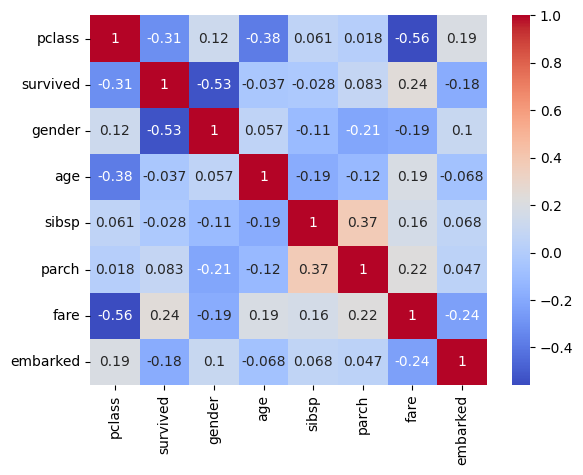

In [70]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

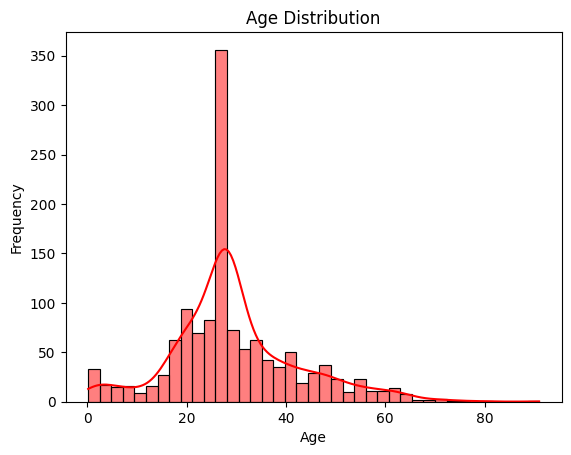

In [76]:
sns.histplot(df['age'], kde=True, color='red')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

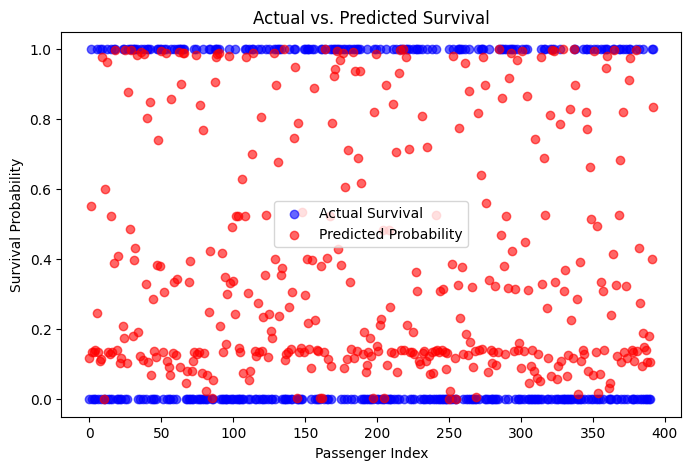

In [67]:
plt.figure(figsize=(8, 5))
plt.scatter(range(len(y_test)), y_test, color='blue', label="Actual Survival", alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, color='red', label="Predicted Probability", alpha=0.6)
plt.xlabel("Passenger Index")
plt.ylabel("Survival Probability")
plt.title("Actual vs. Predicted Survival")
plt.legend()
plt.show()


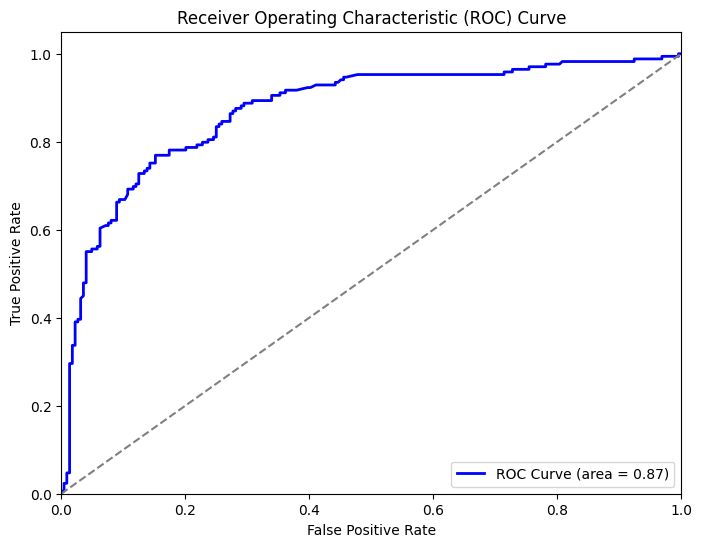

In [68]:
from sklearn.metrics import roc_curve, auc

# Compute ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# 📌 Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal Line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [69]:
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.7888
